<h4> Session 7 </h4>

<h3><i><b>Analysis of CODE6</b></i></h2>
<I>

---


**Target:**

1.   Improve Model accuracy to reach stable test accuracy over 99.4
2.   Use LR Scheduler to add different learning rates to each Epoch.
3.   Change the architecture to make it more efficient.

**Results:**

1.   Parameters: 8846
2.   Best Train Acc: 99.28(13th Epoch)
3.   Best Test Acc: 99.45(9th epoch) / 99.42(13th epoch)
4.   Difference : No overfitting
5.   Epoch - 13

**Analysis:**


1.   Model gives a consistent test accuracy above 99.40 which seems to be a good sign.


---


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')
if device:
  torch.cuda.manual_seed(1)

CUDA Available? <function is_available at 0x00000167FEFB7E20>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
            # transforms.Resize((28, 28)),
            # transforms.RandomRotation((-15., 15.), fill=0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        train = datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms)
        return torch.utils.data.DataLoader(train, **self.kwargs)

    def test_loader(self):
        test = datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms)
        return torch.utils.data.DataLoader(test, **self.kwargs)

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=64)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

##### View sample images from the train loader  <hr>



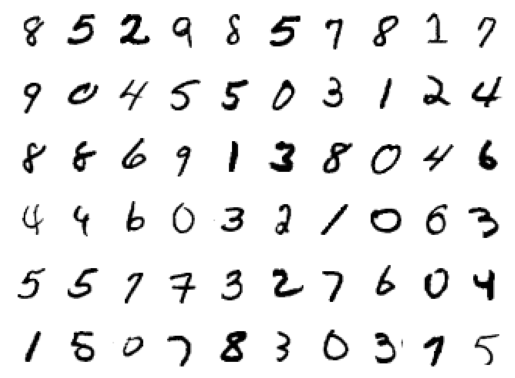

In [6]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 10, 26, 26]             720
              ReLU-6           [-1, 10, 26, 26]               0
       BatchNorm2d-7           [-1, 10, 26, 26]              20
           Dropout-8           [-1, 10, 26, 26]               0
            Conv2d-9           [-1, 12, 24, 24]           1,080
             ReLU-10           [-1, 12, 24, 24]               0
      BatchNorm2d-11           [-1, 12, 24, 24]              24
          Dropout-12           [-1, 12, 24, 24]               0
        MaxPool2d-13           [-1, 12, 12, 12]               0
           Conv2d-14            [-1, 8,

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=9, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0672, Accuracy: 9791/10000 (97.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0550, Accuracy: 9830/10000 (98.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0437, Accuracy: 9869/10000 (98.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0388, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot the Loss/Accuracy for Train/Test dataset

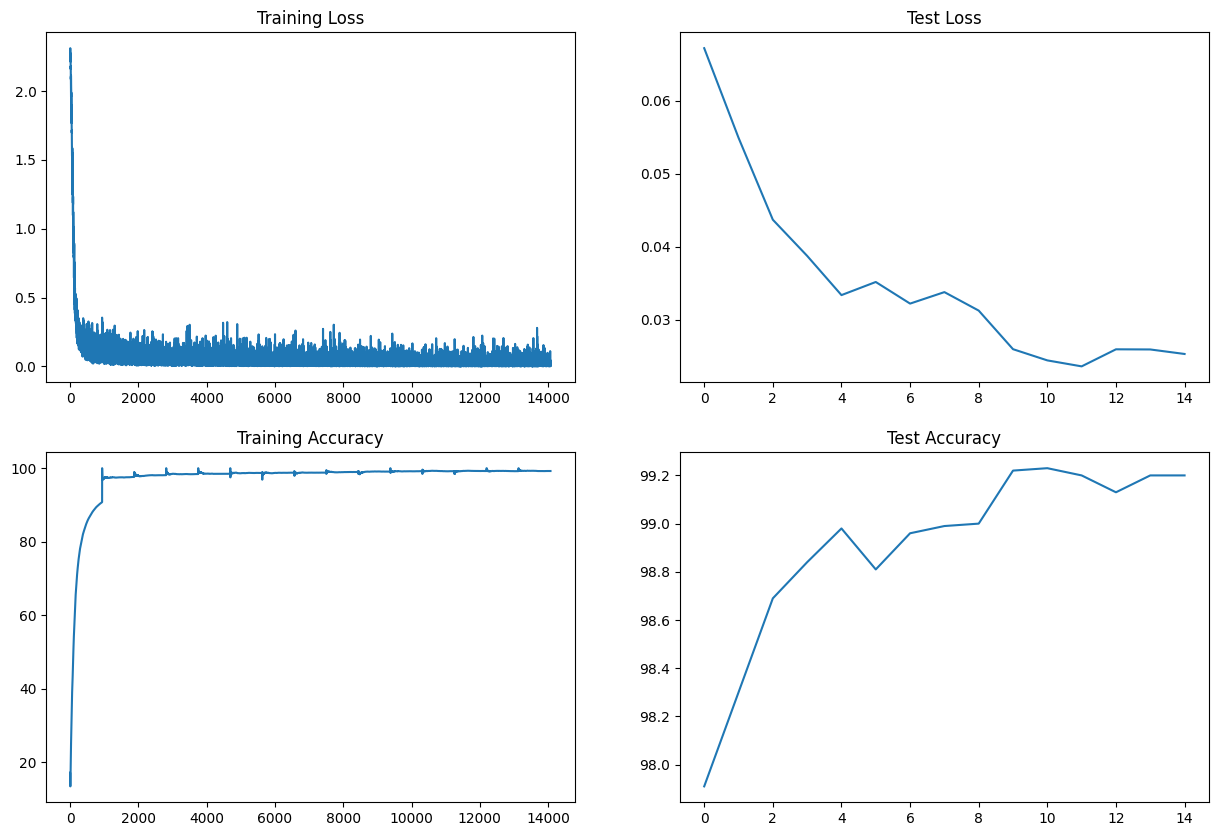

In [9]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()